# Misinformation Game Logo

This notebook contains code to generate the Misinformation Game's logo.

In [1]:
# The width and height of the generated logo-full.png
width = 1024

# A multiplier for the size of the image to help with anti-aliasing.
superSampling = 8

# The number of points around the circle.
pointCount = 8

In [2]:
import pathlib
import math
from PIL import Image, ImageDraw

# The width of the image with super-sampling.
ssWidth = width * superSampling

# Generate the outer circle of the logo.
logo = Image.new("RGBA", (ssWidth, ssWidth))
logoDraw = ImageDraw.Draw(logo)
outerWidth = int(ssWidth / 30)
offset = outerWidth // 2
circleBounds = [(offset, offset), (ssWidth - 1 - offset, ssWidth - 1 - offset)]
logoDraw.ellipse(circleBounds, fill="#FFFFFF")
logoDraw.ellipse(circleBounds, outline="#000000", width=outerWidth)

# Generate the mask representing the circle of the logo.
# This is used to remove the ends of lines that extend over the circle.
mask = Image.new("L", (ssWidth, ssWidth), color=0)
maskDraw = ImageDraw.Draw(mask)
maskDraw.ellipse(circleBounds, fill=255)

# Generate the points around the circle to connect.
radius = (ssWidth - outerWidth / 2) / 2
centreX, centreY = ssWidth // 2, ssWidth // 2
d2r = 2.0 * math.pi / 360.0
points = [(
    centreX + radius * math.cos(a * d2r),
    centreY + radius * math.sin(a * d2r)
) for a in range(0, 360, 360 // pointCount)]

# Generate the lines between points on the circle.
lineWidth = int(ssWidth / 60)
for i1, p1 in enumerate(points):
    for i2, p2 in enumerate(points):
        # Avoid redundant drawing.
        if i2 <= i1:
            continue

        # We don't want to connect adjacent points.
        diff = (i1 - i2 + pointCount) % pointCount
        if diff <= 1 or diff >= pointCount - 1:
            continue

        # Longer lines are made thicker.
        dist = math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
        thisLineWidth = lineWidth + int(max(0, dist - radius) / 20)
        logoDraw.line([p1, p2], fill="#000000", width=thisLineWidth)

# Apply the mask.
logo.putalpha(mask)

# Resize the super-sampled logo back to the target width.
logoFull = logo.resize((width, width), resample=Image.Resampling.LANCZOS)

# Save the image!
pathlib.Path("out").mkdir(exist_ok=True)
logoFull.save("out/logo-full.png")

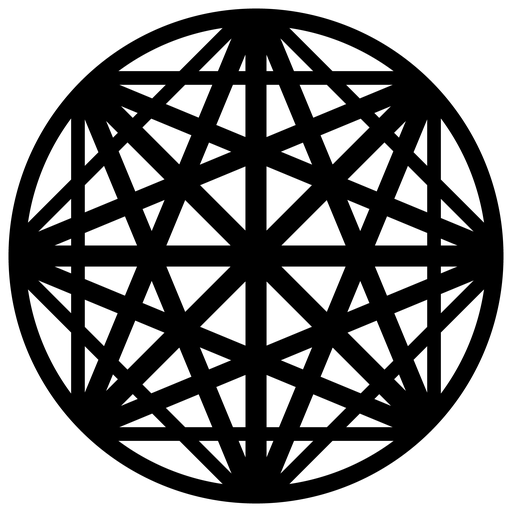

In [3]:
logoLarge = logo.resize((512, 512), resample=Image.Resampling.LANCZOS)
logoLarge.save("out/logo-large.png")
logoLarge

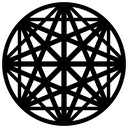

In [4]:
logoMedium = logo.resize((128, 128), resample=Image.Resampling.LANCZOS)
logoMedium.save("out/logo-medium.png")
logoMedium

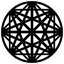

In [5]:
logoSmall = logo.resize((64, 64), resample=Image.Resampling.LANCZOS)
logoSmall.save("out/logo-small.png")
logoSmall

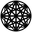

In [6]:
logoTiny = logo.resize((32, 32), resample=Image.Resampling.LANCZOS)
logoTiny.save("out/logo-tiny.png")
logoTiny